In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
table = pd.read_csv("laptop_price.csv",delimiter=',')
table



,Product,Weight,Price_euros
0,17-Y002nv (A10-9600P/6GB/2TB/Radeon,2.65,569.00
1,IdeaPad 310-15ABR,2.40,499.00
2,Aspire 5,2.20,579.00
3,17-ak002nv (A10-9620P/6GB/2TB/Radeon,2.71,655.01
4,X555QG-DM242T (A10-9620P/4GB/1TB,2.20,575.00
...,...,...,...
107,IdeaPad 110-15IBR,2.20,329.00
108,Aspire E5-774G,3.30,629.00
109,Aspire ES1-572,2.40,361.80
110,Inspiron 3567,2.25,428.00


Задание 1

данные из 4 работы:
выборочное среднее для Weight(или x):  1.839
выборочное среднее для Price_euros(или y):  387.198
выборочное ско для Weight(или x):  0.62
выборочное ско для Price_euros(или y):  204.565
---------
нормализация: 


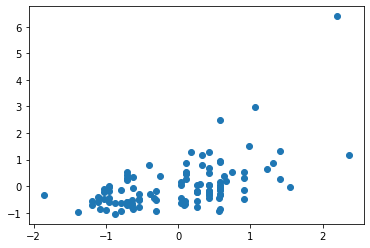

In [49]:
x_mid = 1.839
y_mid = 387.198
x_sko = 0.62
y_sko = 204.565
print('данные из 4 работы:')
print('выборочное среднее для Weight(или x): ', x_mid)
print('выборочное среднее для Price_euros(или y): ', y_mid)
print('выборочное ско для Weight(или x): ', x_sko)
print('выборочное ско для Price_euros(или y): ', y_sko)
print('---------')
x_norm = (table['Weight'] - x_mid)/ x_sko
y_norm = (table['Price_euros'] - y_mid)/ y_sko
print ('нормализация: ')
table_norm = pd.DataFrame({'x': x_norm, 'y': y_norm})
table_norm_medians = table_norm.copy()
plt.scatter(table_norm['x'], table_norm['y'])
plt.show()


Задание 2

In [50]:
n = len(table['Weight'])
k_est = int(np.sqrt(n / 2)//1)
print(f'верхняя оценка количества кластеров: {k_est}')

верхняя оценка количества кластеров: 7


Задание 3

получившаяся таблица соответствия исходных точек центройдам:
           x         y  centroid
0   1.308065  0.888725         6
1   0.904839  0.546535         6
2   0.582258  0.937609         4
3   1.404839  1.309178         6
4   0.582258  0.918055         4
5   0.114516  0.888236         4
6   0.324194  1.182030         4
7   0.420968  0.693188         2
8   0.582258  2.501904         4
9   1.550000 -0.040075         6
10  0.566129 -0.436037         5
11  0.420968  0.052805         2
12  1.404839  0.253230         6
13  0.033871  0.055200         2
14  0.582258  0.057693         2
15  0.114516  0.448229         2
16  0.114516  0.286960         2
17  0.904839  0.302114         2
18  0.630645  0.399883         2
19  0.324194  0.795796         4


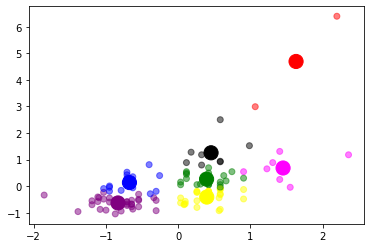

In [51]:
def recalc_centr(data, centroids, mean_median):
    centroid_recalc = []
    for i in range(data.shape[0]):
        errors = np.array([])
        for j in range(centroids.shape[0]):
                if mean_median == 'mean':
                    error = calc_error_mean(centroids.iloc[j, :2], data.iloc[i,:2])
                else:
                    error = calc_error_median(centroids.iloc[j, :2], data.iloc[i,:2])
                errors = np.append(errors, error)
        closest_centr =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_recalc.append(closest_centr)
    return centroid_recalc


def calc_error_mean(a, b):
    return np.square(np.sum((a - b)**2))

def calc_error_median(a, b):
    return np.sum(np.abs(a - b))

def init_centroids(k, data):
    return data.sample(k)

def k_means_medians(data, k, mean_median):
    isContinue = True
    centr_old = pd.DataFrame()
    centr_new = init_centroids(k, data).reset_index(drop=True)
    while isContinue:
        data['centroid'] = recalc_centr(data, centr_new, mean_median)
        if mean_median == 'mean':
            centr_new = data.groupby('centroid').mean().reset_index(drop=True)
        else:
            centr_new = data.groupby('centroid').median().reset_index(drop=True)
        if centr_new.equals(centr_old):
            break
        centr_old = centr_new.copy()
    return data['centroid'], centr_new

table_norm['centroid'], centroids =  k_means_medians(table_norm, k_est, 'mean')
#pd.set_option('display.max_rows', None)
print('получившаяся таблица соответствия исходных точек центройдам:')
print(table_norm.head(20))
colors = {0:'red', 1:'blue', 2:'green', 3: 'purple', 4: 'black', 5: 'yellow', 6: 'magenta'}
plt.scatter(table_norm.iloc[:,0], table_norm.iloc[:,1],  marker = 'o', c = table_norm['centroid'].apply(lambda x: colors[x]),  alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s = 200, c = centroids.index.map(lambda x: colors[x]) )
plt.show()

Задание 4 (k-medians)

получившаяся таблица соответствия исходных точек центройдам:
           x         y  centroid
0   1.308065  0.888725         1
1   0.904839  0.546535         1
2   0.582258  0.937609         1
3   1.404839  1.309178         1
4   0.582258  0.918055         1
5   0.114516  0.888236         1
6   0.324194  1.182030         1
7   0.420968  0.693188         1
8   0.582258  2.501904         1
9   1.550000 -0.040075         2
10  0.566129 -0.436037         2
11  0.420968  0.052805         2
12  1.404839  0.253230         2
13  0.033871  0.055200         2
14  0.582258  0.057693         2


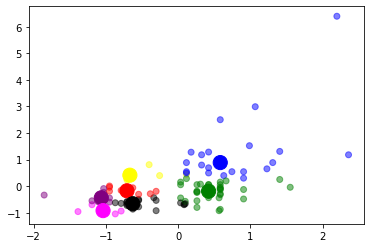

In [52]:
table_norm_medians['centroid'], centroids_med =  k_means_medians(table_norm_medians, k_est, 'median')
print('получившаяся таблица соответствия исходных точек центройдам:')
print(table_norm_medians.head(15))
plt.scatter(table_norm_medians.iloc[:,0], table_norm_medians.iloc[:,1],  marker = 'o', c = table_norm_medians['centroid'].apply(lambda x: colors[x]),  alpha = 0.5)
plt.scatter(centroids_med.iloc[:,0], centroids_med.iloc[:,1],  marker = 'o', s = 200, c = centroids_med.index.map(lambda x: colors[x]) )
plt.show()

Задание 5 (метод локтя)

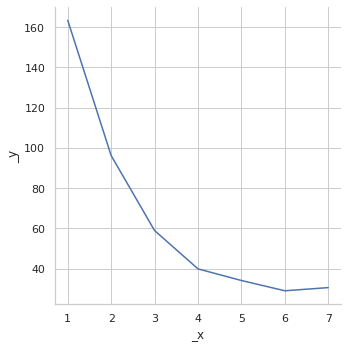

In [59]:
import seaborn as sns

sns.set(style="whitegrid")

errors_elbow = []
errors = []
points = []
for i in range(7):
    errors = []
    table_norm['centroid'], centroids =  k_means_medians(table_norm, i + 1, 'mean')
    for j in range(table_norm.shape[0]):
        err = (table_norm['x'][j] - centroids['x'][table_norm['centroid'][j]])**2 + (table_norm['y'][j] - centroids['y'][table_norm['centroid'][j]])**2
        errors.append(err)
    errors_elbow.append(round(sum(errors), 3))
    points.append(i+1)
sns.relplot(x=points, y=errors_elbow, kind="line")
plt.show()
print('По графику видно, что оптимальное количество кластеров = 6')
